# KLダイバージェンス
Kullback-Leiblerダイバージェンスは二つの確率分布の違いを数値で表現したもの。交差エントロピーから情報エントロピーを引くことで求めることができる。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.special import kl_div

## 2つの分布

<BarContainer object of 6 artists>

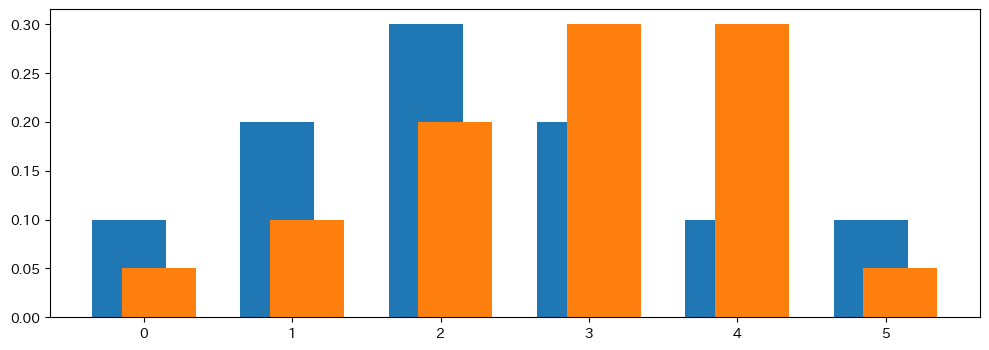

In [2]:
plt.figure(figsize=(12, 4))
a = np.array([0.1, 0.2, 0.3, 0.2, 0.1, 0.1])
b = np.array([0.05, 0.1, 0.2, 0.3, 0.3, 0.05])

plt.bar(np.arange(a.shape[0]) - 0.1, a, width=0.5)
plt.bar(np.arange(b.shape[0]) + 0.1, b, width=0.5)

## KLD

In [3]:
def kld(dist1, dist2):
    """KLダイバージェンス"""
    assert dist1.shape == dist2.shape, "確率分布1と確率分布2は同じ長さである必要があります"
    assert all(dist1) != 0 and all(dist2) != 0, "確率分布に0を含んではいけません"
    dist1 = dist1 / np.sum(dist1)
    dist2 = dist2 / np.sum(dist2)
    return sum([p1 * np.log2(p1 / p2) for p1, p2 in zip(dist1, dist2)])


print(f"同じ分布ならKLDは0のはず→{kld(a, a)}")
print(f"違う分布ならKLDは0より大きいはず→{kld(a, b)}")
print(f"違う分布ならKLDは0より大きいがkld(a, b)とは違う値になるかも→{kld(b, a)}")

同じ分布ならKLDは0のはず→0.0
違う分布ならKLDは0より大きいはず→0.3
違う分布ならKLDは0より大きいがkld(a, b)とは違う値になるかも→0.3339850002884623


## Jensen–Shannon Divergenceの導入

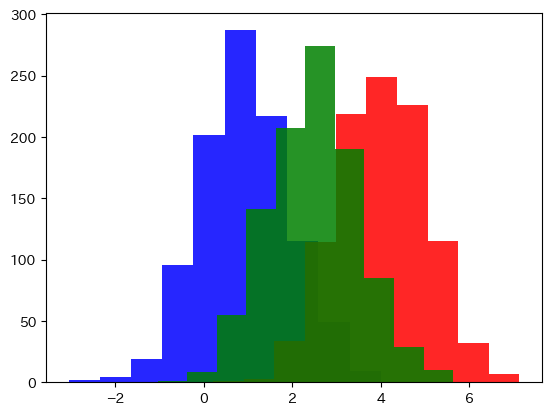

In [4]:
plt.hist(np.random.normal(1, 1, 1000), alpha=0.85, color="blue")
plt.hist(np.random.normal(4, 1, 1000), alpha=0.85, color="red")
plt.hist(np.random.normal(2.5, 1, 1000), alpha=0.85, color="green")
plt.show()